In [96]:
import pandas as pd

In [97]:
path = r"C:\Users\s147057\Documents\GitHub\DataProcessing\week_2\input.csv"
df = pd.read_csv(path)

In [98]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita) dollars,Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700 dollars,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500 dollars,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000 dollars,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000 dollars,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000 dollars,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [99]:
items = [key for i,key in enumerate(list(df)) if i in [0,1,4,7,8]]

In [100]:
df = df[items]
print(df['Country'].is_unique)
print(df['Region'].is_unique)

True
False


In [101]:
fail = []
for index, row in df.iterrows():
    try:
        if len(row[0]) < 2:
            raise
        if len(row[1]) < 2:
            raise
        df.iloc[[index], [1]] = row[1].capitalize().strip() 
        
        three = float(row[2].replace(',','.'))
        df.iloc[[index], [2]] = three

        four = float(row[3].replace(',','.'))
        df.iloc[[index], [3]] = four

        five = int(row[4].replace(' dollars',''))
        df.iloc[[index], [4]] = five
        
    except Exception as e:
        print(list(row))
        fail.append(index)
        print(index)
        print(e)

['Aruba ', 'Latin amer. & carib', 'unknown', '5,89', '28000 dollars']
10
could not convert string to float: 'unknown'
['Cook Islands ', 'Oceania', 89.1, nan, '5000 dollars']
47
'float' object has no attribute 'replace'
['Cyprus ', 'Near east', 'unknown', '7,18', '19200 dollars']
52
could not convert string to float: 'unknown'
['Czech Republic ', 'Eastern europe', 129.8, 3.93, 'unknown']
53
invalid literal for int() with base 10: 'unknown'
['Iceland ', 'Western europe', 'unknown', '3,31', '30900 dollars']
93
could not convert string to float: 'unknown'
['Jamaica ', 'Latin amer. & carib', 250.9, 12.36, 'unknown']
102
invalid literal for int() with base 10: 'unknown'
['Laos ', 'Asia (ex. near east)', 26.9, 85.22, 'unknown']
113
invalid literal for int() with base 10: 'unknown'
['Malaysia ', 'Asia (ex. near east)', 'unknown', '17,7', '9000 dollars']
126
could not convert string to float: 'unknown'
['Saudi Arabia ', 'Near east', 'unknown', '13,24', '11800 dollars']
179
could not convert str

In [102]:
df = df.drop(fail)


In [103]:
df.tail()

,Country,Region,Pop. Density (per sq. mi.),Infant mortality (per 1000 births),GDP ($ per capita) dollars
220,Virgin Islands,Latin amer. & carib,56.9,8.03,17200
222,West Bank,Near east,419.9,19.62,800
224,Yemen,Near east,40.6,61.5,800
225,Zambia,Sub-saharan africa,15.3,88.29,800
226,Zimbabwe,Sub-saharan africa,31.3,67.69,1900


In [104]:
GDP = df[list(df)[4]]

In [105]:
import numpy as np
gdp = np.array(GDP)

In [106]:
gdp.mean()

11391.627906976744

In [107]:
np.median(gdp)

5500.0

In [108]:
from scipy import stats
stats.mode(gdp)[0][0]

800

In [134]:
# gdp = np.delete(gdp, list(gdp).index(max(gdp)))
quarts = np.percentile(GDP, [25, 50, 75])
lent = len(GDP)
# q1 = GDP[int(lent*(quarts[0]/100))]
# q3 = GDP[int(lent*(quarts[2]/100))]
q2 = quarts[1]
q3 = quarts[2]
gdp = [i for i in list(GDP) if i < q3 + (q3 - q2)*4]

In [142]:
q3 + (q3 - q2)*4

57250.0

In [140]:
len(gdp)
GDP = list(GDP)
GDP.pop(GDP.index(max(GDP)))
max(GDP)


55100

In [60]:
import matplotlib.pyplot as plt
d = {}
hist = []
bins = []
for i in gdp:
    i = int(i/500)
    i *= 500
    if i in d:
        d[i] += 1
        hist.append(i)
    else:
        hist.append(i)
        d[i] = 1
        bins.append(i)
len(d)

60

In [61]:
bins.sort()


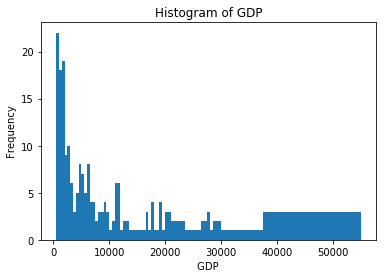

In [62]:
plt.hist(hist, bins)
plt.title("Histogram of GDP")
plt.xlabel(" GDP ")
plt.ylabel(" Frequency ")
plt.show()

In [63]:
from numpy import percentile
from numpy.random import rand

# generate data sample
data = df[list(df)[3]]

# calculate quartiles
quarts = percentile(data, [25, 50, 75])

# calculate min/max
data_min, data_max = data.min(), data.max()

# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quarts[0])
print('Median: %.3f' % quarts[1])
print('Q3: %.3f' % quarts[2])
print('Max: %.3f' % data_max)

Min: 2.290
Q1: 8.340
Median: 21.520
Q3: 56.405
Max: 191.190


In [64]:
df.head()

,Country,Region,Pop. Density (per sq. mi.),Infant mortality (per 1000 births),GDP ($ per capita) dollars
0,Afghanistan,Asia (ex. near east),48,163.07,700
1,Albania,Eastern europe,124.6,21.52,4500
2,Algeria,Northern africa,13.8,31,6000
3,American Samoa,Oceania,290.4,9.27,8000
4,Andorra,Western europe,152.1,4.05,19000


In [73]:
import json

# json.dumps(d)
df.set_index('Country')

,Region,Pop. Density (per sq. mi.),Infant mortality (per 1000 births),GDP ($ per capita) dollars
Country,,,,
Afghanistan,Asia (ex. near east),48,163.07,700
Albania,Eastern europe,124.6,21.52,4500
Algeria,Northern africa,13.8,31,6000
American Samoa,Oceania,290.4,9.27,8000
Andorra,Western europe,152.1,4.05,19000
Angola,Sub-saharan africa,9.7,191.19,1900
Anguilla,Latin amer. & carib,132.1,21.03,8600
Antigua & Barbuda,Latin amer. & carib,156,19.46,11000
Argentina,Latin amer. & carib,14.4,15.18,11200


In [90]:
def save2json(df, filename = 'data.txt'):
    d = {}
    keys = list(df)
    for index, row in df.iterrows():
        d[row[0]] = {}
        for i, item in enumerate(row[1:]):
            d[row[0]][keys[i+1]] = item

    with open(filename, 'w') as outfile:  
        json.dump(d, outfile)

In [91]:
save2json(df, 'json_data')

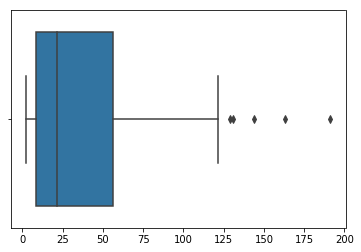

In [95]:
import seaborn as sns
sns.boxplot(x=list(df['Infant mortality (per 1000 births)']))

In [84]:
d

{'Afghanistan ': {'Region': 'Asia (ex. near east)',
  'Pop. Density (per sq. mi.)': 48.0,
  'Infant mortality (per 1000 births)': 163.07,
  'GDP ($ per capita) dollars': 700},
 'Albania ': {'Region': 'Eastern europe',
  'Pop. Density (per sq. mi.)': 124.6,
  'Infant mortality (per 1000 births)': 21.52,
  'GDP ($ per capita) dollars': 4500},
 'Algeria ': {'Region': 'Northern africa',
  'Pop. Density (per sq. mi.)': 13.8,
  'Infant mortality (per 1000 births)': 31.0,
  'GDP ($ per capita) dollars': 6000},
 'American Samoa ': {'Region': 'Oceania',
  'Pop. Density (per sq. mi.)': 290.4,
  'Infant mortality (per 1000 births)': 9.27,
  'GDP ($ per capita) dollars': 8000},
 'Andorra ': {'Region': 'Western europe',
  'Pop. Density (per sq. mi.)': 152.1,
  'Infant mortality (per 1000 births)': 4.05,
  'GDP ($ per capita) dollars': 19000},
 'Angola ': {'Region': 'Sub-saharan africa',
  'Pop. Density (per sq. mi.)': 9.7,
  'Infant mortality (per 1000 births)': 191.19,
  'GDP ($ per capita) dollar

In [89]:
d

{'Afghanistan ': {'Region': 'Asia (ex. near east)',
  'Pop. Density (per sq. mi.)': 48.0,
  'Infant mortality (per 1000 births)': 163.07,
  'GDP ($ per capita) dollars': 700},
 'Albania ': {'Region': 'Eastern europe',
  'Pop. Density (per sq. mi.)': 124.6,
  'Infant mortality (per 1000 births)': 21.52,
  'GDP ($ per capita) dollars': 4500},
 'Algeria ': {'Region': 'Northern africa',
  'Pop. Density (per sq. mi.)': 13.8,
  'Infant mortality (per 1000 births)': 31.0,
  'GDP ($ per capita) dollars': 6000},
 'American Samoa ': {'Region': 'Oceania',
  'Pop. Density (per sq. mi.)': 290.4,
  'Infant mortality (per 1000 births)': 9.27,
  'GDP ($ per capita) dollars': 8000},
 'Andorra ': {'Region': 'Western europe',
  'Pop. Density (per sq. mi.)': 152.1,
  'Infant mortality (per 1000 births)': 4.05,
  'GDP ($ per capita) dollars': 19000},
 'Angola ': {'Region': 'Sub-saharan africa',
  'Pop. Density (per sq. mi.)': 9.7,
  'Infant mortality (per 1000 births)': 191.19,
  'GDP ($ per capita) dollar